<a href="https://colab.research.google.com/github/PriFranca/AIRBNB/blob/master/AirBnbRio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image

Image(url='https://img4.cityrealty.com/neo/i/p/mig/airbnb_guide.jpg')

In [0]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import altair as alt




In [0]:
li = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-11-22/visualisations/listings.csv')


In [0]:
li.head()

id  ... availability_365
0  17878  ...              303
1  25026  ...              119
2  31560  ...               88
3  35636  ...               85
4  35764  ...              128

[5 rows x 16 columns]

In [0]:
li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33715 entries, 0 to 33714
Data columns (total 16 columns):
id                                33715 non-null int64
name                              33654 non-null object
host_id                           33715 non-null int64
host_name                         33695 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     33715 non-null object
latitude                          33715 non-null float64
longitude                         33715 non-null float64
room_type                         33715 non-null object
price                             33715 non-null int64
minimum_nights                    33715 non-null int64
number_of_reviews                 33715 non-null int64
last_review                       19149 non-null object
reviews_per_month                 19149 non-null float64
calculated_host_listings_count    33715 non-null int64
availability_365                  33715 non-null int64
dt

In [0]:
li.nunique()

id                                33715
name                              32590
host_id                           24064
host_name                          6277
neighbourhood_group                   0
neighbourhood                       153
latitude                          11174
longitude                         14790
room_type                             4
price                               856
minimum_nights                       76
number_of_reviews                   250
last_review                        1408
reviews_per_month                   560
calculated_host_listings_count       49
availability_365                    366
dtype: int64

In [0]:
li.shape

(33715, 16)

In [0]:
li.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [0]:
li.drop(['id','neighbourhood_group'],axis=1,inplace=True)

In [0]:
li.isnull().sum()

name                                 61
host_id                               0
host_name                            20
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       14566
reviews_per_month                 14566
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [0]:
li.last_review = pd.to_datetime(li.last_review)

In [0]:
li.reviews_per_month.fillna(0.0,inplace=True)

In [0]:
li.host_name.fillna('Not Stated',inplace = True)

In [0]:
li.name.fillna('No Description',inplace = True)


In [0]:
li.last_review.fillna(li.last_review.min(),inplace=True)


In [0]:
def impute_median(series):
    return series.fillna(series.median())

In [0]:
li.reviews_per_month=li["reviews_per_month"].transform(impute_median)

In [0]:
li.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

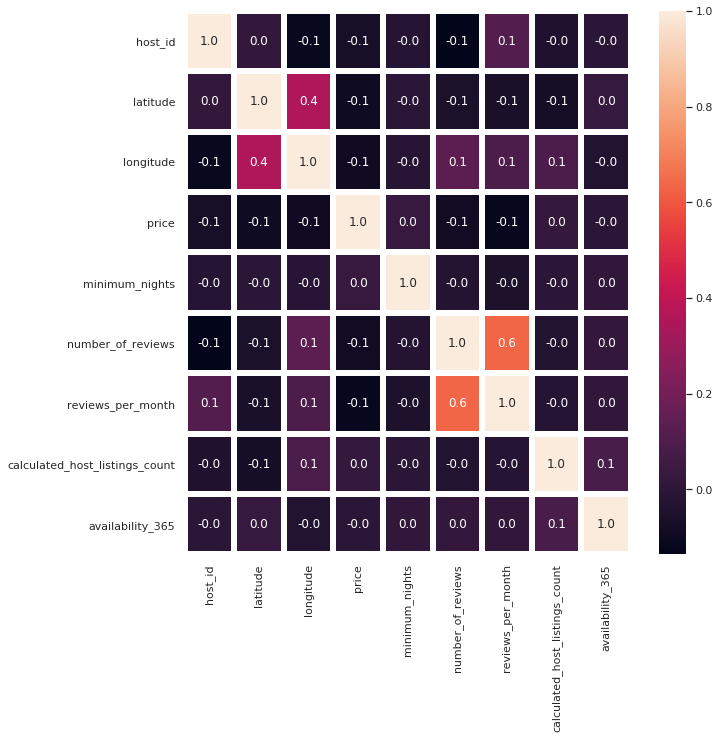

In [0]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(li.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

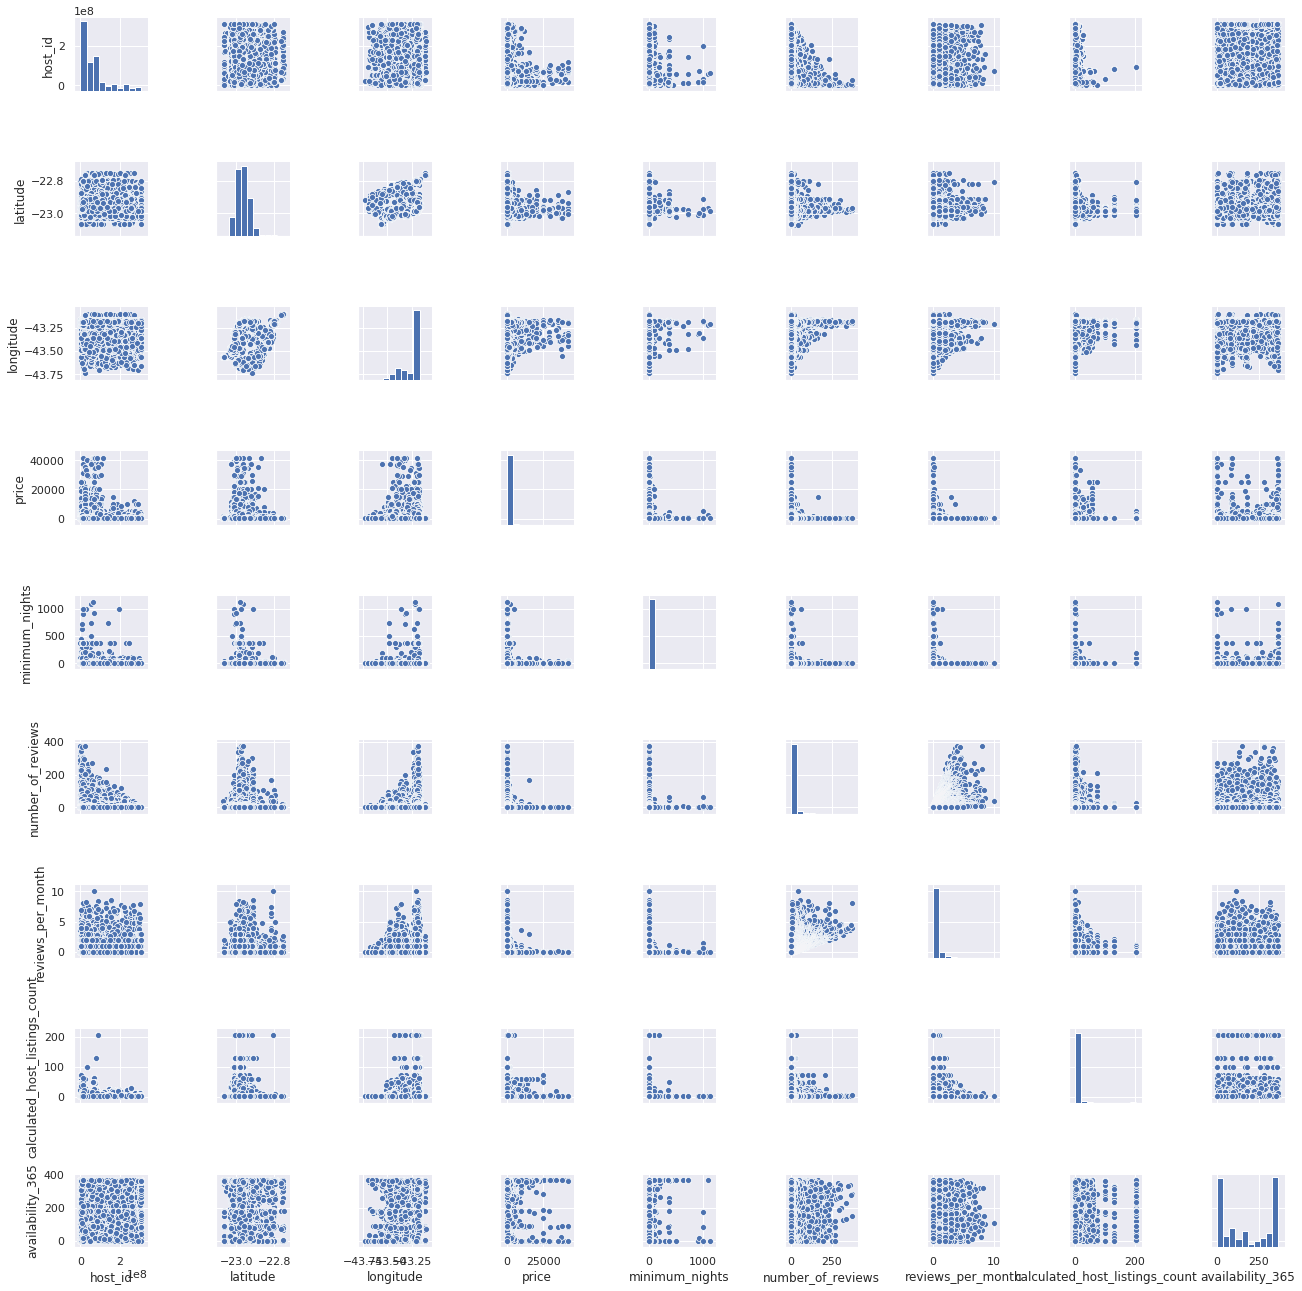

In [0]:
sns.pairplot(li,size = 2)
plt.show()

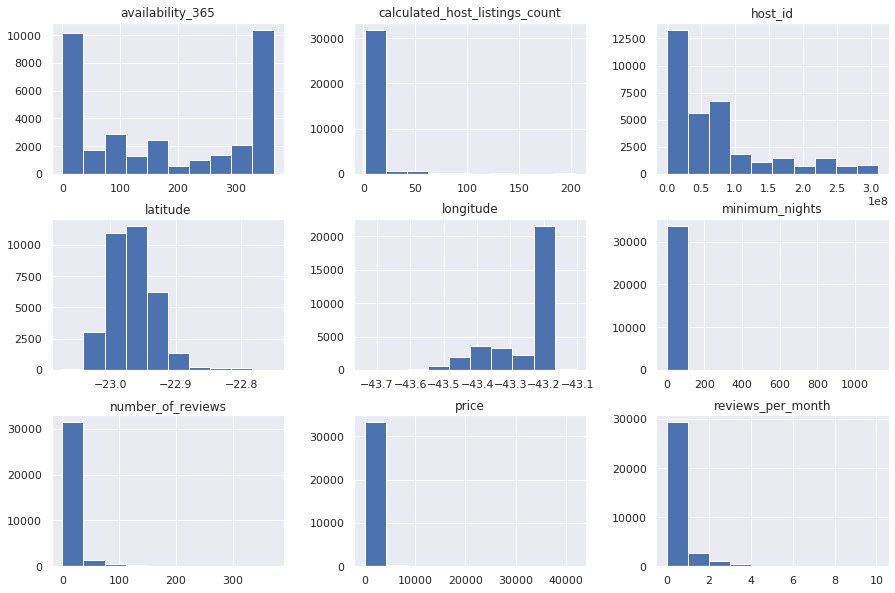

In [0]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
li.hist(ax=ax)
plt.show()

In [0]:
li[li.duplicated(['host_id','neighbourhood'],keep=False)].sort_values(['host_id'])

name  ...  availability_365
17678     Brand new studio with Wi-Fi, Cable TV and A/C.  ...               149
11937  2 bdrm apt. with WiFi-Cable TV-A/C+great locat...  ...               104
22926          2bedrooms+2bathrooms+Wi-Fi+AC+KingSizeBed  ...                 0
23249  Excellent 1 bedroom apartment in the beach block!  ...               120
25572        View to the beach and to the Christ statue!  ...               118
...                                                  ...  ...               ...
33554              Suíte em cobertura frente praia Barra  ...               365
33644             Seanfront apartment RJ Barra da Tijuca  ...               133
33642                       Ocean view apartment premium  ...               118
33701                                      BLESSED PLACE  ...               302
33690                                      GREAT JOURNEY  ...               293

[11549 rows x 14 columns]

In [0]:
dup_li = li[li.duplicated(['host_id','neighbourhood'],keep=False)].sort_values(['host_id'])


In [0]:
dup_dict = dup_li.host_id.value_counts()

In [0]:
import operator
sorted_x = sorted(dup_dict.items(), key=operator.itemgetter(1))

In [0]:
top10 = [i[0] for i in sorted_x[::-1][:10]]

In [0]:
top10_hosts = li[li.host_id.isin(top10)]

In [0]:
top10_hosts.host_name.value_counts()

Daniel                     205
Mario                      130
André                      100
Diogo - Estadia Carioca     74
Temporada                   64
Marcio                      62
Latin Exclusive             59
Chad                        58
Nereu A                     57
Vitor & Carlos              50
Name: host_name, dtype: int64

In [0]:
import altair as alt
import pandas as pd
 #10 anfitriões com mais hospedagens
source = pd.DataFrame({
    'Anfitriões': ['Daniel', 'Mario', 'André', 'Diogo - Estadia Carioca', 'Temporada', 'Marcio', 'Latin Exclusive ', 'Chad', 'Nereu A ','Vitor & Carlos'],
    'Número de Rooms': [205, 130, 100, 74, 64, 62, 59, 58, 57,50]
})

alt.Chart(source).mark_bar().encode(
    x='Número de Rooms',
    y=('Anfitriões'),
    color=alt.value('orange')
)  


alt.Chart(...)

In [0]:
top10_hosts.groupby('host_name')['number_of_reviews'].mean().reset_index()

host_name  number_of_reviews
0                    André           1.120000
1                     Chad           2.086207
2                   Daniel           0.643902
3  Diogo - Estadia Carioca          14.324324
4          Latin Exclusive           1.322034
5                   Marcio           5.258065
6                    Mario           6.653846
7                  Nereu A           2.631579
8                Temporada           0.156250
9           Vitor & Carlos          16.180000

In [0]:
top10_host_numrv = top10_hosts.groupby('host_name')['number_of_reviews'].mean().reset_index()


In [0]:
top10_hosts.groupby('host_name')['price'].mean().reset_index()


host_name        price
0                    André   605.660000
1                     Chad  2381.396552
2                   Daniel   662.941463
3  Diogo - Estadia Carioca   991.027027
4          Latin Exclusive  6329.203390
5                   Marcio  1256.903226
6                    Mario   107.015385
7                  Nereu A   539.105263
8                Temporada   639.921875
9           Vitor & Carlos   506.700000

In [0]:
top10_host_price = top10_hosts.groupby('host_name')['price'].mean().reset_index()


In [0]:
names,n = top10_host_numrv['host_name'],top10_host_numrv['number_of_reviews']


In [0]:
names,price = top10_host_price['host_name'],top10_host_price['price']


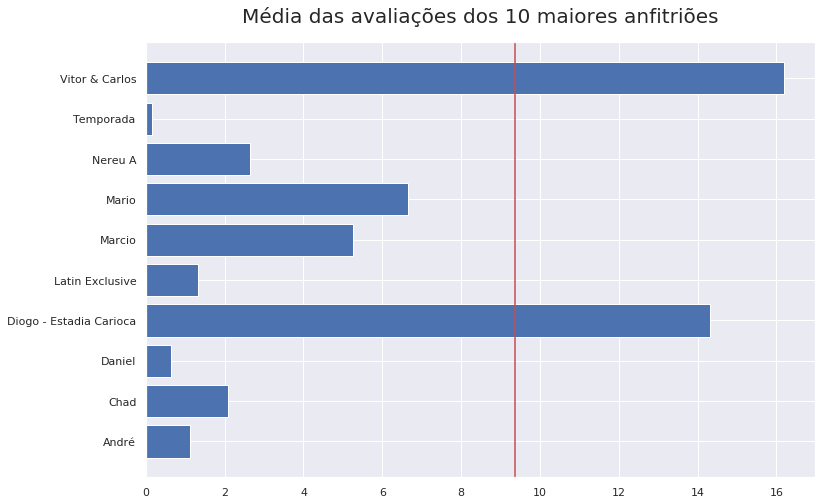

In [0]:
f,ax = plt.subplots(figsize=(12,8))
ax.barh(names,n)
ax.axvline(li.number_of_reviews.mean(),color='r')
ax.set_title('Média das avaliações dos 10 maiores anfitriões',fontsize=20,pad=20)
plt.show()

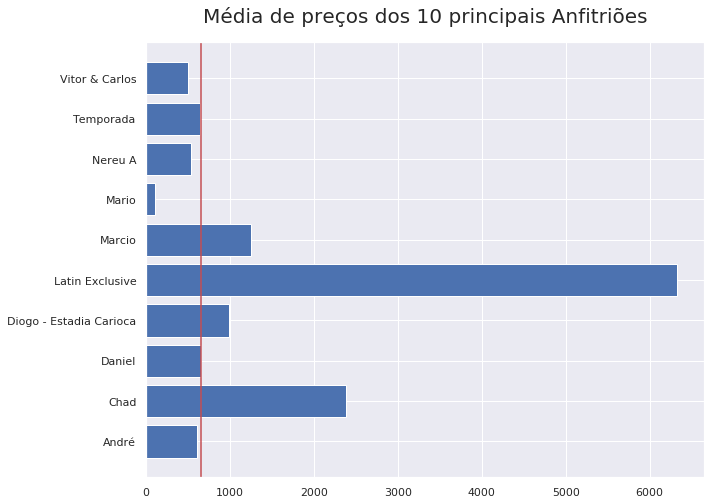

In [0]:
f,ax = plt.subplots(figsize=(10,8))
ax.barh(names,price)
ax.axvline(li.price.mean(),color='r')
ax.set_title('Média de preços dos 10 principais Anfitriões',fontsize=20,pad=20)
plt.show()

In [0]:
top_neighbourhood=li.neighbourhood.value_counts().head(10)
top_neighbourhood

Copacabana                  8443
Barra da Tijuca             3837
Ipanema                     2885
Jacarepaguá                 1987
Botafogo                    1660
Recreio dos Bandeirantes    1649
Leblon                      1555
Santa Teresa                1060
Centro                       900
Flamengo                     867
Name: neighbourhood, dtype: int64

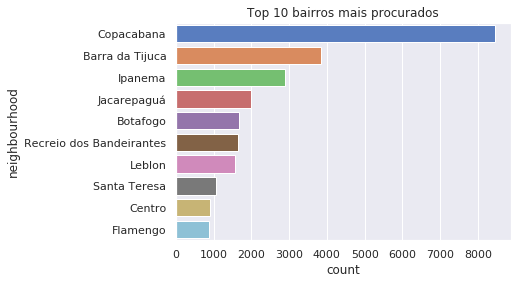

In [0]:
top10nei= sns.countplot(y='neighbourhood', data=li, palette="muted", order=li['neighbourhood'].value_counts().head(10).index) \
.set_title("Top 10 bairros mais procurados")

In [0]:
nb_price = li.groupby('neighbourhood')['price'].agg([np.mean,np.std]).reset_index()



In [0]:
nb_price

neighbourhood         mean          std
0             Abolição   478.800000   357.157808
1    Alto da Boa Vista  1733.018519  2730.426164
2             Anchieta  1041.000000  1326.231378
3              Andaraí   778.910112  2151.169331
4                 Anil   599.428571   851.178078
..                 ...          ...          ...
148       Vila Militar  2366.333333  2213.951294
149     Vila Valqueire   384.937500   373.899000
150      Vila da Penha   277.500000   303.472953
151       Vista Alegre    80.000000          NaN
152         Água Santa   808.250000  1156.007317

[153 rows x 3 columns]

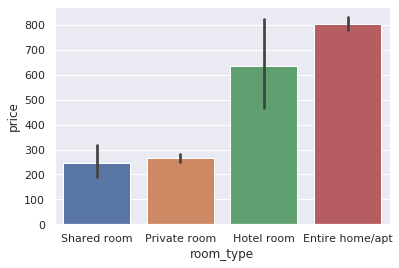

In [0]:
result = li.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=li, order=result['room_type'])
plt.show()

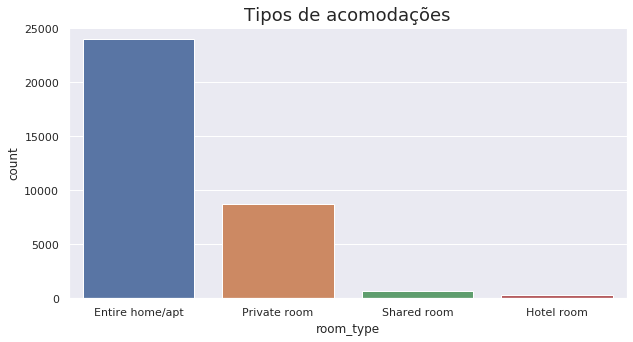

Entire home/apt    23947
Private room        8737
Shared room          715
Hotel room           316
Name: room_type, dtype: int64

In [0]:
plt.figure(figsize = (10, 5))
sns.countplot(x='room_type', data=li)
plt.title('Tipos de acomodações', fontsize=18)
plt.show()

li.room_type.value_counts()

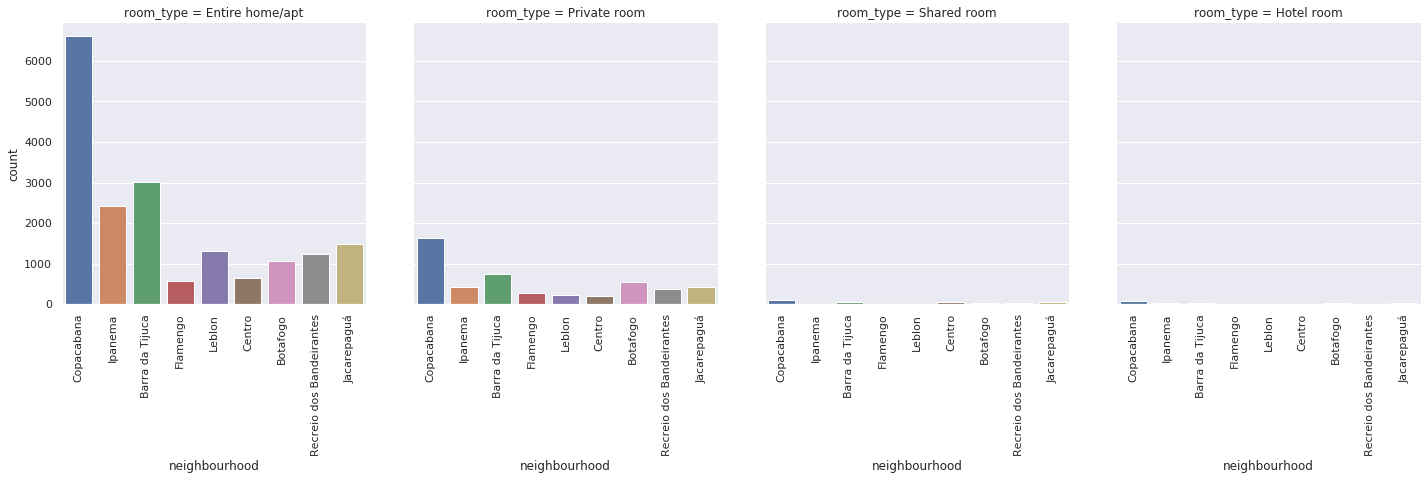

In [0]:
sub_9=li.loc[li['neighbourhood'].isin(['Copacabana','Barra da Tijuca','Ipanema','Jacarepaguá',
                 'Botafogo','Recreio dos Bandeirantes','Leblon','Santa Teresa ','Centro','Flamengo'])]
viz_3=sns.catplot(x='neighbourhood', col='room_type', data=sub_9, kind='count')
viz_3.set_xticklabels(rotation=90)

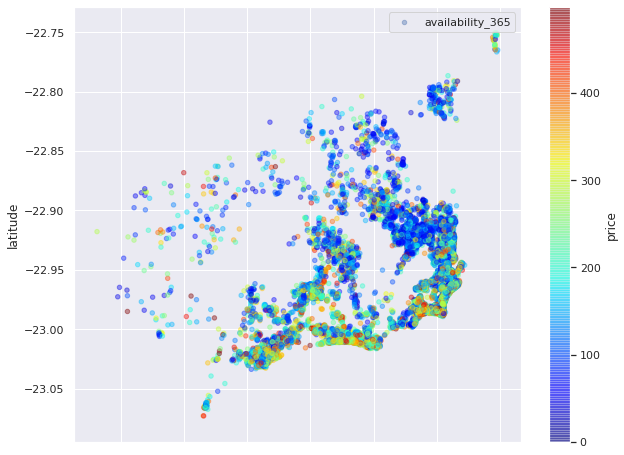

In [0]:
#disponibilidade no ano
sub_11=li[li.price < 500]


viz_4=sub_11.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

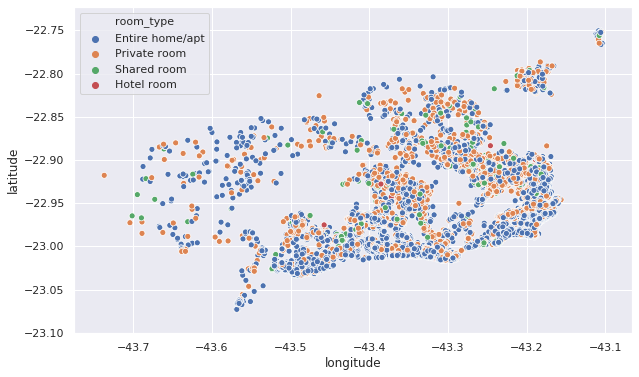

In [0]:
#espaços oferecidos
plt.figure(figsize=(10,6))
sns.scatterplot(li.longitude,li.latitude,hue=li.room_type)
plt.ioff()

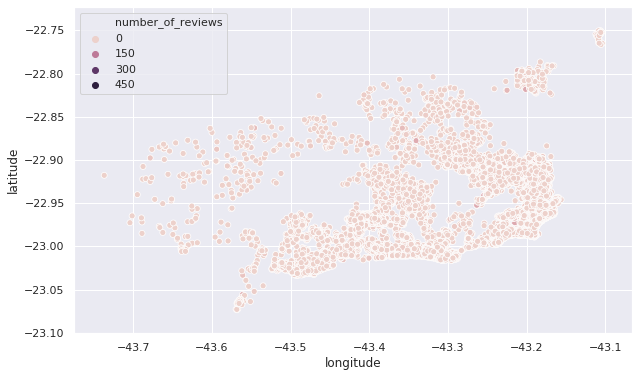

In [0]:
#números de avaliações
plt.figure(figsize=(10,6))
sns.scatterplot(li.longitude,li.latitude,hue=li.number_of_reviews)
plt.ioff()

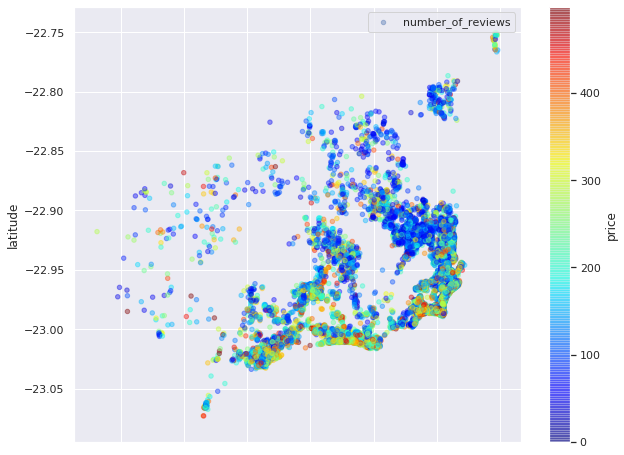

In [0]:
#números de de avaliações por preços
viz_4=sub_11.plot(kind='scatter', x='longitude', y='latitude', label= 'number_of_reviews', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [0]:
from wordcloud import WordCloud

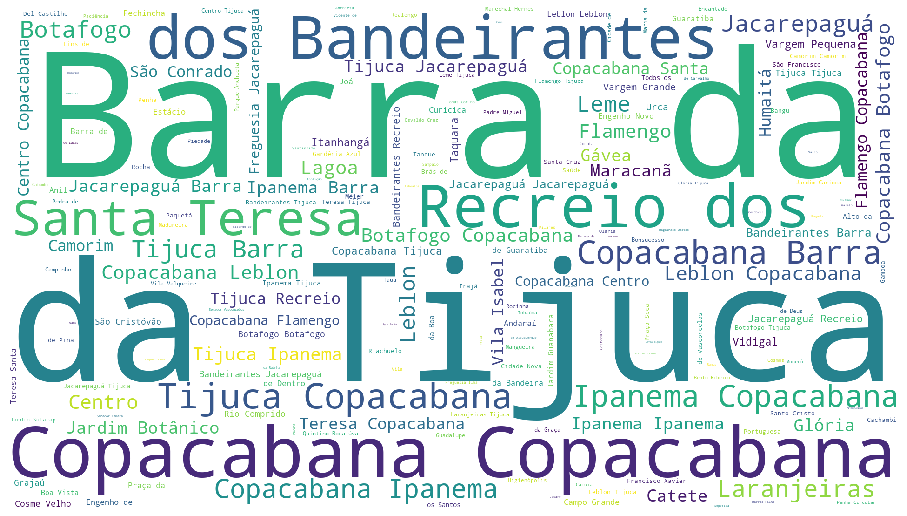

In [0]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(li.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

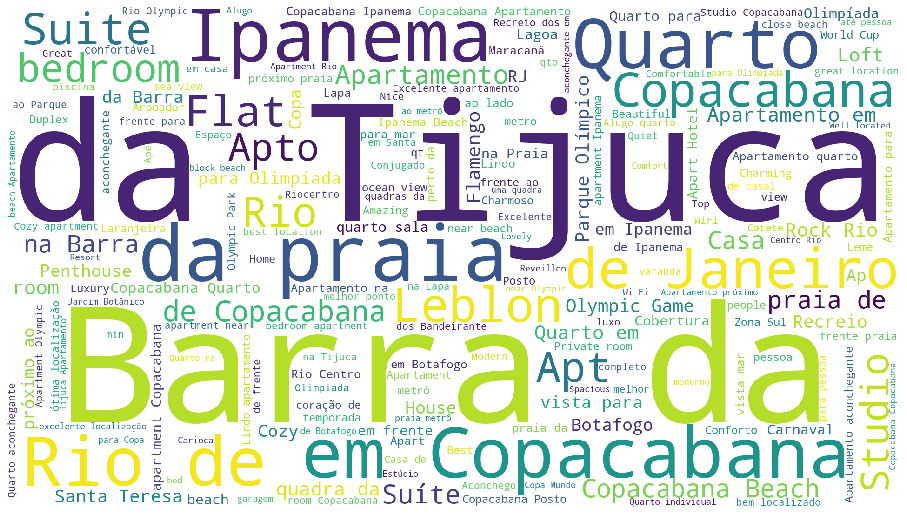

In [0]:
plt.subplots(figsize=(16,10))
wordcloudd = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(li.name))
plt.imshow(wordcloudd)
plt.axis('off')
plt.savefig('name.png')
plt.show()

In [0]:
import plotly.express as px

temp = li.host_id.value_counts().reset_index().head(5)
temp.columns = ['host_id', 'count']
temp = temp.merge(li[['host_id','host_name','price', 'latitude','longitude']], left_on = 'host_id',right_on = 'host_id', how = 'left', copy = False)

fig = px.scatter_mapbox(temp, 
                        lat="latitude", 
                        lon="longitude", 
                        color="host_name", 
                        size="price",
                         
                        size_max=30, 
                        opacity = .70,
                        zoom=11,
                       )
              
fig.layout.mapbox.style = 'stamen-terrain'
fig.update_layout(title_text = 'Top 5 Anfitriões e localização da Hospedagem<br>(Click na legenda para ver os dados)', height = 800)

fig.show()

In [0]:
fig = px.scatter_mapbox(li, 
                        hover_data = ['price','minimum_nights','room_type'],
                        hover_name = 'neighbourhood',
                        lat="latitude", 
                        lon="longitude", 
                        color="room_type", 
                        size="price",
                        size_max=30, 
                        opacity = .70,
                        zoom=9.5,
                       )

fig.layout.mapbox.style = 'stamen-terrain'
fig.update_layout(title_text = 'Rio De Janeiro por Tipo de Hospedagem<br>(Click na legenda para ver os dados)', height = 800)
fig.show()

In [0]:

fig = px.scatter_mapbox(li, 
                        lat="latitude", 
                        lon="longitude", 
                        color="neighbourhood",                        
                        size_max=30, 
                        opacity = .70,
                        zoom=9.5,
                       )

fig.layout.mapbox.style = 'stamen-terrain'
fig.update_layout(title_text = 'Rio De Janeiro por Bairro<br>(Click na legenda para ver os dados)', height = 800)

fig.show()